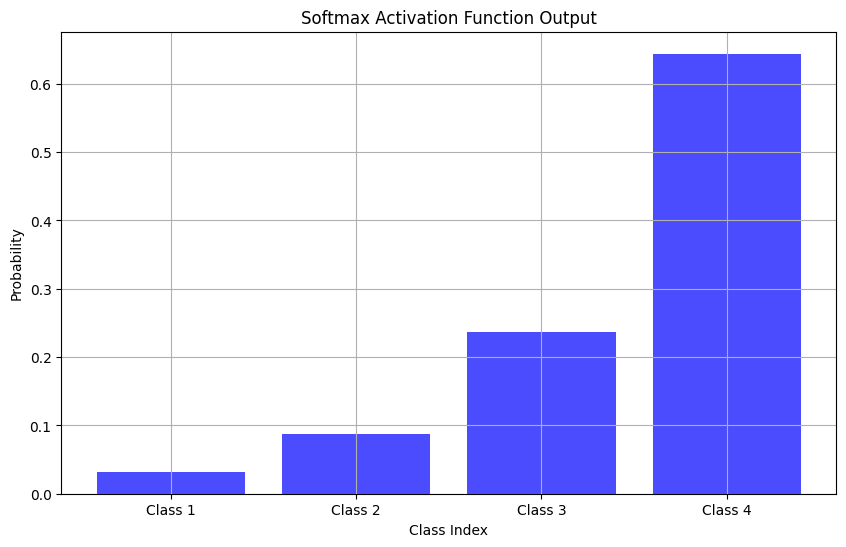

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Numerical stability
    return exp_x / np.sum(exp_x)

# Derivative of Softmax (Jacobian row for a single element)
def softmax_derivative(x, i):
    s = softmax(x)
    jacobian = np.zeros((len(x), len(x)))
    for j in range(len(x)):
        for k in range(len(x)):
            if j == k:
                jacobian[j, k] = s[j] * (1 - s[j])
            else:
                jacobian[j, k] = -s[j] * s[k]
    return jacobian[i]

# Sample input
x = np.array([1.0, 2.0, 3.0, 4.0])
y = softmax(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(x)), y, color='blue', alpha=0.7)
plt.title('Softmax Activation Function Output')
plt.xlabel('Class Index')
plt.ylabel('Probability')
plt.xticks(range(len(x)), [f'Class {i+1}' for i in range(len(x))])
plt.grid(True)
plt.show()

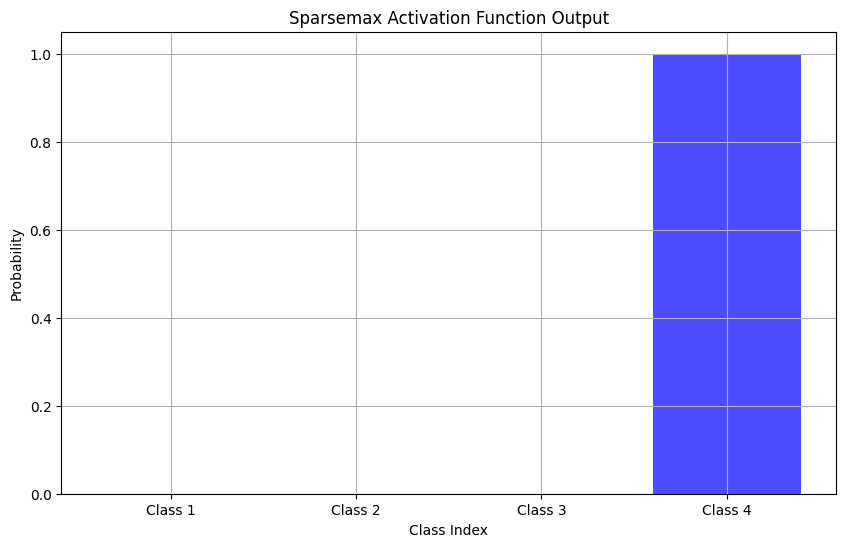

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sparsemax function
def sparsemax(x):
    z = np.sort(x)[::-1]                          # Sort descending
    z_cumsum = np.cumsum(z)
    k = np.arange(1, len(x) + 1)
    
    # Find k satisfying condition
    z_check = z - (z_cumsum - 1) / k
    k_valid = np.where(z_check > 0)[0]
    k_max = k_valid[-1] + 1                        # Convert to 1-based index
    
    # Compute threshold tau
    tau = (np.sum(z[:k_max]) - 1) / k_max
    
    # Compute projection
    return np.maximum(0, x - tau)

# Example usage
x = np.array([1.0, 2.0, 3.0, 4.0])
y = sparsemax(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(x)), y, color='blue', alpha=0.7)
plt.title('Sparsemax Activation Function Output')
plt.xlabel('Class Index')
plt.ylabel('Probability')
plt.xticks(range(len(x)), [f'Class {i+1}' for i in range(len(x))])
plt.grid(True)
plt.show()

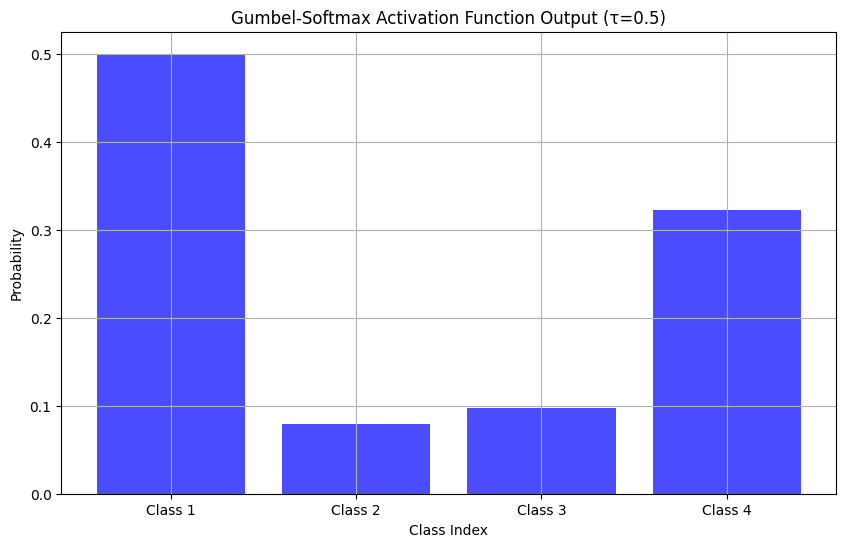

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Gumbel-Softmax function
def gumbel_softmax(x, tau=0.5):
    # Sample Gumbel noise
    u = np.random.uniform(0, 1, size=x.shape)
    g = -np.log(-np.log(u + 1e-20) + 1e-20)
    
    # Apply Gumbel-Softmax
    y = np.exp((x + g) / tau)
    return y / np.sum(y)

# Example usage
x = np.array([1.0, 2.0, 3.0, 4.0])
y = gumbel_softmax(x, tau=0.5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(x)), y, color='blue', alpha=0.7)
plt.title('Gumbel-Softmax Activation Function Output (τ=0.5)')
plt.xlabel('Class Index')
plt.ylabel('Probability')
plt.xticks(range(len(x)), [f'Class {i+1}' for i in range(len(x))])
plt.grid(True)
plt.show()